# 積み上げ縦棒グラフでの属性の選択など，適切な層化(比較軸)の候補の出し方を知る(2022/03/29)
---

## 概要
---

本notebookでは，棒グラフ描画を例として，属性ごとに可視化を実現するプロセスを実践する．新たな概念や手法について述べるわけではない．

層化(比較軸)の候補を出す場合には，以下の2つの視点がある．

1. 種類の観点：どのような基準で属性を分けるかということ．例えば，メーカー別・天候別・男女別・年収階級別等，枚挙にいとまがない．
1. 粒度の観点：どれくらい細かく属性を分けるかということ．例えば時間帯について比較軸を洗い出す際に，3時間ごとに分けるのか，1時間ごとに分けるのか，1分ごとに分けるのか，といったようなことを検討することである．目的や可視化した際の見やすさなどを加味して，複数の軸で表現するということも当然ある．

それでは早速，2020年の『家計調査　家計収支編』のデータを用いて，目的に応じた軸だしのシミュレーションを行ってみる．

In [1]:
# データの読み込み
import pandas as pd

df = pd.read_excel("income2020.xlsx", "二人・全国",
                   header=8,
                   index_col=[0,1,2,3,4,5],
                   usecols="H:M,O:AF")
df.dropna(inplace=True)
df

,,,,,,200万円未満,200～250万円,250～300万円,300～350万円,350～400万円,400～450万円,450～500万円,500～550万円,550～600万円,600～650万円,650～700万円,700～750万円,750～800万円,800～900万円,"900～1,000万円","1,000～1,250万円","1,250～1,500万円","1,500万円以上"
一連番号,時間軸コード,階層コード,分類コード,用途分類,単位,,,,,,,,,,,,,,,,,,
1,2.020000e+09,1.0,00000,世帯数分布(抽出率調整),"10,000分比",314,443,726,872,777,706,721,610,541,531,482,475,374,629,502,693,294,311
2,2.020000e+09,1.0,00000,集計世帯数,世帯,277,354,575,687,607,536,518,468,401,396,362,341,276,452,355,490,205,206
3,2.020000e+09,1.0,00000,世帯人員,人,2.26,2.43,2.37,2.41,2.51,2.81,2.84,3.08,3.14,3.15,3.25,3.31,3.26,3.36,3.4,3.49,3.47,3.41
4,2.020000e+09,2.0,00000,18歳未満人員,人,0.17,0.2,0.13,0.17,0.23,0.46,0.51,0.73,0.69,0.77,0.81,0.88,0.79,0.87,0.86,0.9,0.81,0.72
5,2.020000e+09,2.0,00000,65歳以上人員,人,1.21,1.32,1.5,1.55,1.33,1.05,0.95,0.74,0.7,0.57,0.56,0.38,0.48,0.32,0.35,0.32,0.4,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2.020000e+09,4.0,00000,(再掲)情報通信関係費,円,10291,10714,11930,13304,14524,16012,17110,18095,19179,19570,18517,19527,19841,20001,20735,21220,22643,21331
143,2.020000e+09,4.0,00000,(再掲)消費支出(除く住居等)1),円,129616,157394,167468,187559,198302,216534,217523,226713,246446,249140,263548,267126,261285,281991,309414,331228,369916,412414
144,2.020000e+09,1.0,00000,エンゲル係数,％,32.3,31.6,32.2,30.3,28.9,28.9,28.4,28.9,28,27.4,26.2,26.6,26.4,26.1,25.5,24.9,24.5,24.1


このデータでは，様々な消費財に対して，階級別の支出金額が平均と共に示されている．また，「階層コード」「分類コード」によって支出の層化がなされている．例えば「階層コード」では1から6番までの番号が振られていて，より大きな番号であるほど詳細な項目で分類されている．

ここではまず粒度の観点から，「階層コード」の4番で積み上げ縦棒グラフを作成してみる．

In [2]:
df_hie_no4 = df.loc[:,:,4.0]
df_hie_no4.reset_index(level=[0,1,2,3,5], drop=True, inplace=True)
df_hie_no4

,200万円未満,200～250万円,250～300万円,300～350万円,350～400万円,400～450万円,450～500万円,500～550万円,550～600万円,600～650万円,650～700万円,700～750万円,750～800万円,800～900万円,"900～1,000万円","1,000～1,250万円","1,250～1,500万円","1,500万円以上"
用途分類,,,,,,,,,,,,,,,,,,
食料,49235,57014,60898,65219,67186,71543,71686,76049,77816,77807,80277,81265,80300,83786,90837,95474,104151,115918
住居,15774,13492,12900,13558,17446,16264,21079,18923,17995,14879,18268,16012,18725,15085,18056,22397,22836,25297
光熱・水道,17219,19000,19546,20486,20871,21987,21537,21805,22999,22543,21628,21971,21823,22457,23545,23911,24203,28444
家具・家事用品,6074,8662,8793,9691,10247,11943,11250,11138,13044,12341,13785,13508,12439,14114,15327,19108,18680,21864
被服及び履物,2997,4066,3845,4890,5489,6716,6693,7915,8343,9200,10055,10412,9459,12086,12196,15007,17543,24171
保健医療,8706,11328,11935,13285,14111,14517,14134,13213,13905,13779,16202,13171,13542,15210,14211,16568,19868,21583
交通・通信,15739,20843,22825,28229,34211,33286,34243,39867,40038,46303,47526,48268,48841,51167,55465,57774,56440,57539
教育,1699,2223,1763,1238,2142,4186,4644,6747,9022,9373,12933,13113,12976,15923,25693,24127,34277,31138
教養娯楽,11273,14156,14584,17656,18752,20604,20504,21131,23872,24766,26938,28428,27259,29934,32094,36142,42247,48485


<AxesSubplot:ylabel='用途分類'>

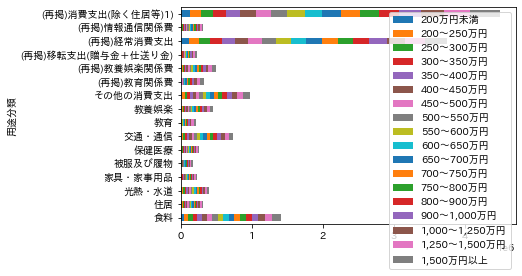

In [3]:
import japanize_matplotlib
import matplotlib.pyplot as plt

df_hie_no4.plot.barh(stacked=True)

上の棒グラフを見れば分かるように，非常に見づらい．適切な粒度設定で可視化を行わないと，このように読み取りづらい可視化になってしまう．

では，仮に「収入に応じて被服および履物に支出の差はみられるかを視覚的に検証する」という設定で，再度棒グラフを作成してみる．このデータでは「階層コード」ともう一つ「分類コード」が設定されているため，これを活用する．

In [4]:
# 「分類コード」5番台が服飾カテゴリ
df_cloth = df.loc[:,:,:,["5"]]
df_cloth.reset_index(level=[0,1,2,3,5], drop=True, inplace=True)
df_cloth

,200万円未満,200～250万円,250～300万円,300～350万円,350～400万円,400～450万円,450～500万円,500～550万円,550～600万円,600～650万円,650～700万円,700～750万円,750～800万円,800～900万円,"900～1,000万円","1,000～1,250万円","1,250～1,500万円","1,500万円以上"
用途分類,,,,,,,,,,,,,,,,,,
被服及び履物,2997,4066,3845,4890,5489,6716,6693,7915,8343,9200,10055,10412,9459,12086,12196,15007,17543,24171


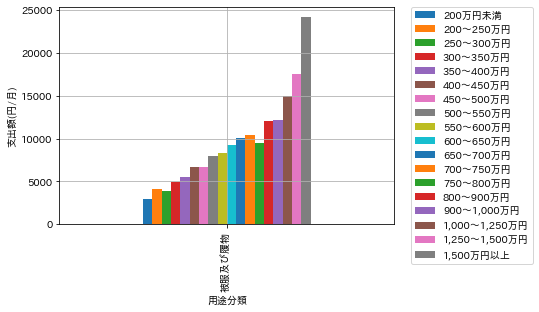

In [5]:
df_cloth.plot.bar(ylabel="支出額(円/月)", grid=True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

これを見ると分かるように，概ね収入が増えるにつれて服飾品にかけるお金も増える傾向にある．とりわけ年収が1000万を超えてくると，かける金額も跳ね上がる．

また，年収700万円台後半の階級で支出額が下落している点も注目に値する．

続いて，服飾品の粒度をさらに細かくして，カテゴリごとの支出額の差を見てみる．

In [6]:
# 「分類コード」5.x番台が服飾サブカテゴリ
df_cloth_sub = df.loc[:,:,:,["5.1", "5.2", "5.3", "5.4", "5.5", "5.6", "5.7", "5.8"]]
df_cloth_sub.reset_index(level=[0,1,2,3,5], drop=True, inplace=True)
df_cloth_sub

,200万円未満,200～250万円,250～300万円,300～350万円,350～400万円,400～450万円,450～500万円,500～550万円,550～600万円,600～650万円,650～700万円,700～750万円,750～800万円,800～900万円,"900～1,000万円","1,000～1,250万円","1,250～1,500万円","1,500万円以上"
用途分類,,,,,,,,,,,,,,,,,,
和服,56,29,7,32,170,66,189,10,28,13,122,29,35,411,13,351,38,257
洋服,937,1320,1218,1658,1828,2364,2466,3140,3370,3536,4064,4399,3981,4816,5107,6204,7862,10636
シャツ・セーター類,570,819,805,924,1061,1403,1192,1546,1598,1900,1926,2014,1788,2260,2353,2741,3184,5050
下着類,457,574,570,740,745,821,799,855,918,924,1014,995,939,1119,1223,1257,1525,1676
生地・糸類,99,199,118,141,141,132,117,147,126,137,171,148,107,126,124,138,145,235
他の被服,274,401,370,472,481,640,640,693,664,786,800,833,824,910,859,1053,1161,1593
履物類,455,560,532,684,734,975,928,1144,1252,1220,1392,1500,1305,1559,1729,1975,2430,2677
被服関連サービス,149,165,225,240,329,316,363,381,387,685,565,494,479,886,788,1288,1198,2047


<AxesSubplot:xlabel='用途分類', ylabel='支出額(円/月)'>

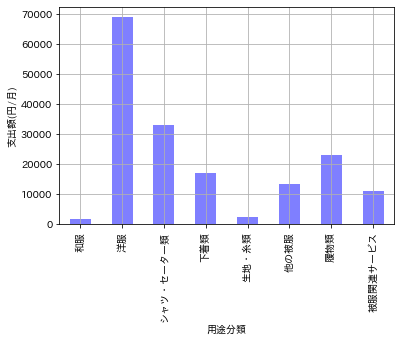

In [7]:
df_cloth_sub.plot.bar(stacked=True, ylabel="支出額(円/月)", grid=True, color='b', alpha=0.5, legend=False)

上記のグラフは平均値ではなく，全ての階級値を足したものである点に注意する．

全体の傾向として，和服・生地・糸類への支出は2020年の段階で非常に少ないものになっていることが分かる．洋服への支出額は圧倒的であり，それに続いてシャツ・セーター類への支出が続いている．洋服とシャツ・セーター類のサブカテゴリを足せば，洋装と和装の支出額の差はかなり開いている．

上記のグラフでは単純に支出を合計してしまったが，階級ごとの差はどうであろうか．「種類の観点」から，年収の一番低い階級(200万円未満)と一番高い階級(1500万円以上)とで比較してみる．

<AxesSubplot:xlabel='用途分類', ylabel='支出額(円/月)'>

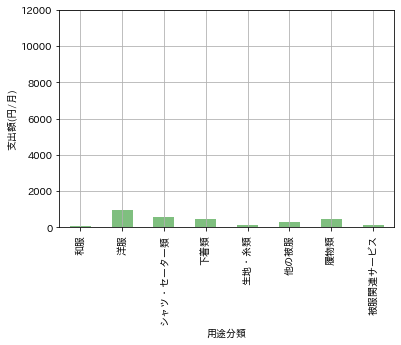

In [8]:
df_cloth_sub.loc[:,"200万円未満"].plot.bar(ylim=(0,12000), ylabel="支出額(円/月)", grid=True, color='g', alpha=0.5)

<AxesSubplot:xlabel='用途分類', ylabel='支出額(円/月)'>

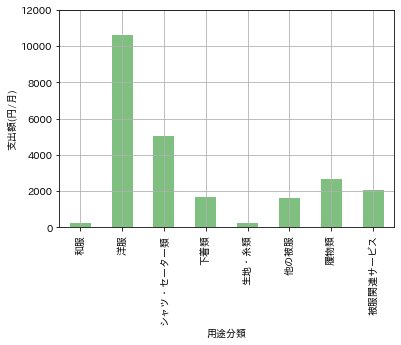

In [9]:
df_cloth_sub.loc[:,"1,500万円以上"].plot.bar(ylim=(0,12000), ylabel="支出額(円/月)", grid=True, color='g', alpha=0.5)

両者を比較すると，全サブカテゴリで支出額は年収1,500万円以上の階級の方が多い．
注目点は，和服と生地・糸類への支出は両者でさほど差がないという点である．ここでも全体の傾向として見られた和装への支出額の少なさが伺える．

## 参考文献
---

W.McKinney，Pythonによるデータ分析入門　第2版，株式会社オライリー・ジャパン，2018.

菅由紀子ら，最短突破　データサイエンティスト検定(リテラシーレベル)公式リファレンスブック，技術評論社，2021.

[pandas.read_excel，pandas 1.4.1 documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

[pandas.DataFrame.reset_index，1.4.1 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

[pandas.DataFrame.plot.bar，1.4.1 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

[pandas.DataFrame.plot，1.4.1 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

[WSL:Ubuntuでのmatplotlibを日本語化，よちよちpython](https://chayarokurokuro.hatenablog.com/entry/2021/06/18/163744)

[pandas.plotで凡例の場所を変更したい，stackoverflow](https://ja.stackoverflow.com/questions/62006/pandas-plot%E3%81%A7%E5%87%A1%E4%BE%8B%E3%81%AE%E5%A0%B4%E6%89%80%E3%82%92%E5%A4%89%E6%9B%B4%E3%81%97%E3%81%9F%E3%81%84)

[matplotlib の legend(凡例) の 位置を調整する，Qiita](https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462)

[matplotlib.pyplot.legend，Matplotlib 3.5.1 documentation](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.legend.html)